<a href="https://colab.research.google.com/github/R452h/Employee-Joining-Prediction-Using-Logistic-Regression/blob/main/IMB_HR_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression

# -------------------- LOAD DATA --------------------
file_path = "/content/IMB553-XLS-ENG (1).xlsx"
df = pd.read_excel(file_path)

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (12333, 17)


,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [2]:
print("\nSummary of Dataset:\n")
print(df.info())

print("\nMissing Values:\n")
print(df.isnull().sum())

print("\nStatistical Summary:\n")
df.describe()



Summary of Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Candidate.Ref                12333 non-null  int64  
 1   DOJ.Extended                 12333 non-null  object 
 2   Duration.to.accept.offer     9614 non-null   float64
 3   Notice.period                12333 non-null  int64  
 4   Offered.band                 12333 non-null  object 
 5   Pecent.hike.expected.in.CTC  11586 non-null  float64
 6   Percent.hike.offered.in.CTC  11737 non-null  float64
 7   Percent.difference.CTC       11482 non-null  float64
 8   Joining.Bonus                12333 non-null  object 
 9   Candidate.relocate.actual    12333 non-null  object 
 10  Gender                       12333 non-null  object 
 11  Candidate.Source             12333 non-null  object 
 12  Rex.in.Yrs                   12333 non-null  int64  

,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age
count,1.233300e+04,9614.000000,12333.000000,11586.000000,11737.000000,11482.000000,12333.000000,12333.000000
mean,2.872888e+06,21.189619,37.943323,41.837663,37.772016,-2.078916,4.160788,30.232304
std,5.099726e+05,26.410351,24.526587,29.435844,35.593317,19.997159,2.810108,4.178853
min,2.109586e+06,-228.000000,0.000000,-68.830000,-60.530000,-68.950000,0.000000,19.000000
25%,2.378256e+06,2.000000,30.000000,25.000000,20.000000,-9.090000,3.000000,27.000000
50%,2.820675e+06,9.000000,30.000000,38.890000,34.480000,0.000000,4.000000,30.000000
75%,3.338197e+06,32.000000,60.000000,52.170000,47.060000,0.000000,6.000000,34.000000
max,3.836076e+06,224.000000,120.000000,359.770000,471.430000,300.000000,26.000000,64.000000


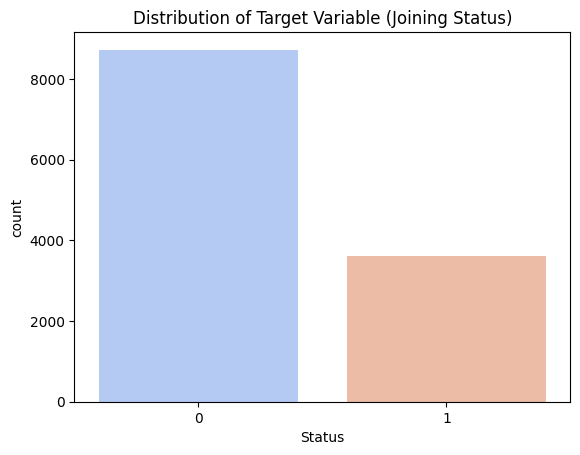

In [14]:
sns.countplot(x="Status", hue="Status", data=df, palette="coolwarm", legend=False)
plt.title("Distribution of Target Variable (Joining Status)")
plt.show()



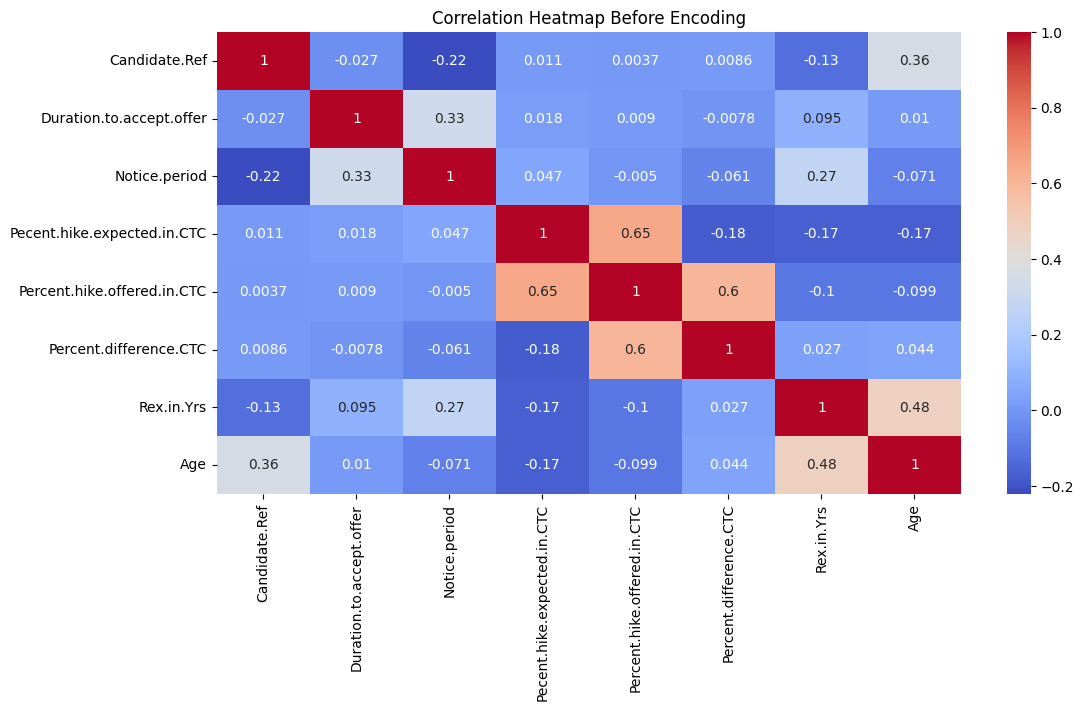

In [4]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Before Encoding")
plt.show()


In [5]:
df.fillna(df.median(numeric_only=True), inplace=True)

le_dict = {}
categorical_columns = df.select_dtypes(include=["object"]).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le


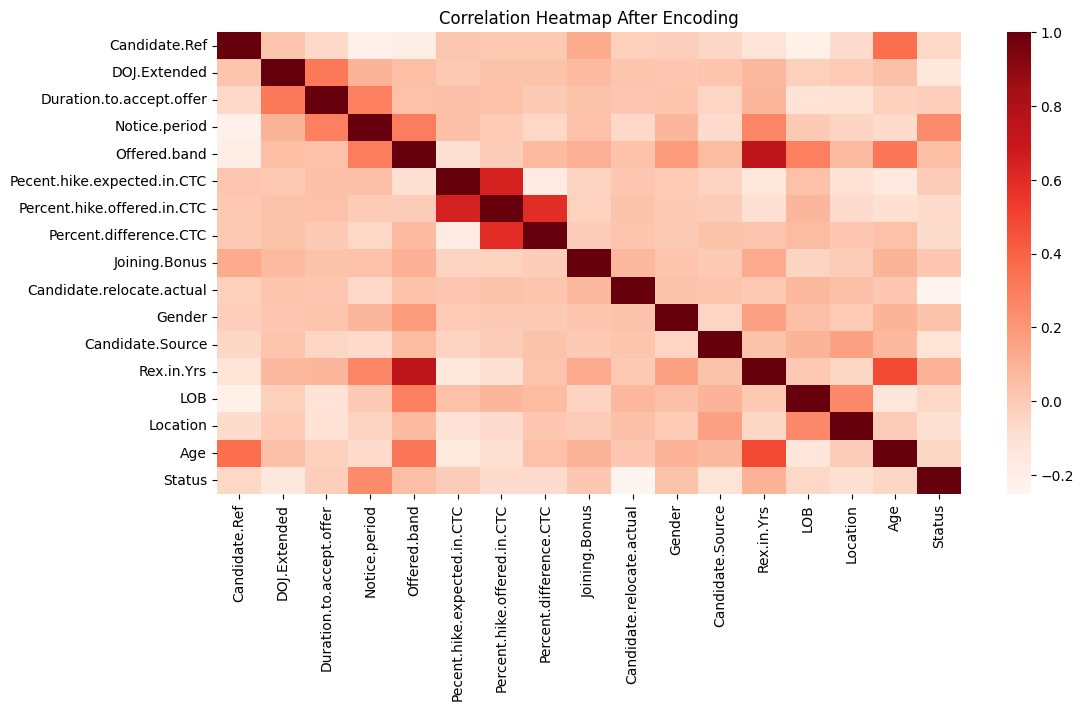

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=False, cmap="Reds")
plt.title("Correlation Heatmap After Encoding")
plt.show()


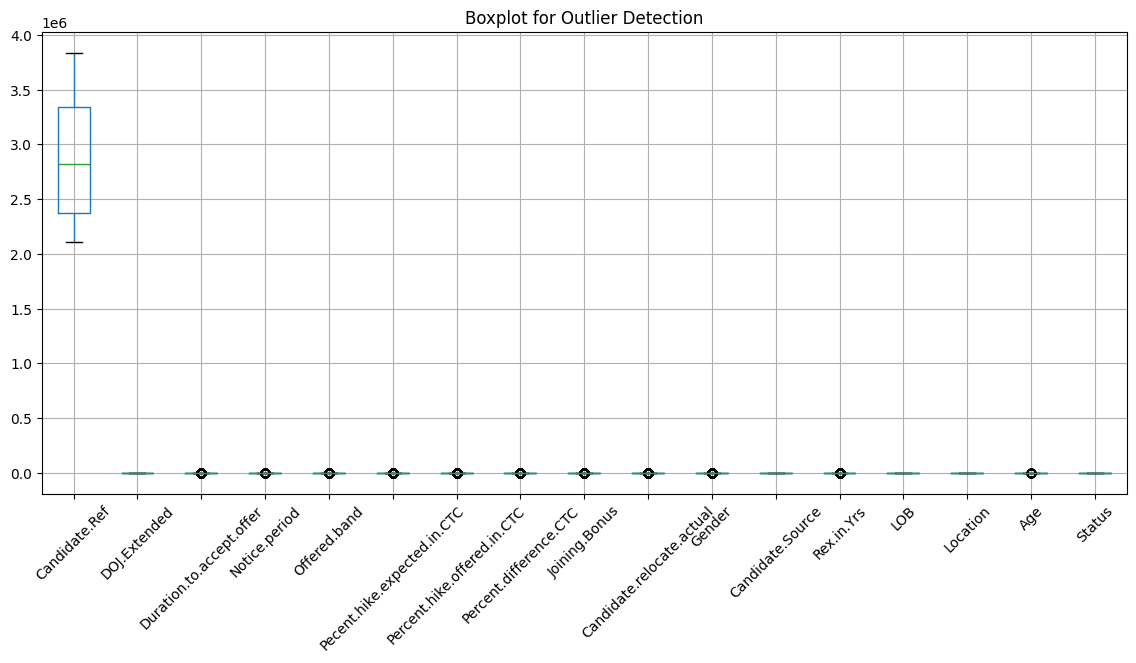

In [7]:
numeric_columns = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(14,6))
df[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()


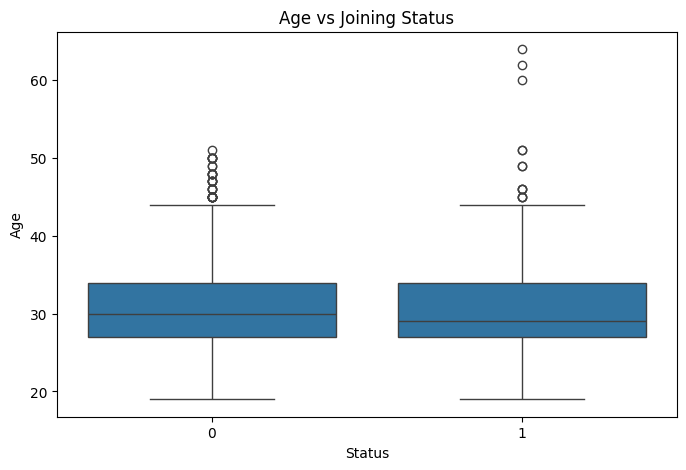

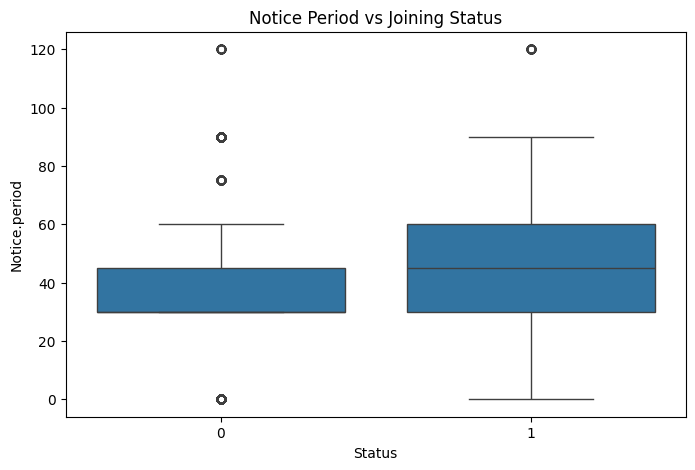

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Status", y="Age", data=df)
plt.title("Age vs Joining Status")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="Status", y="Notice.period", data=df)
plt.title("Notice Period vs Joining Status")
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split again with scaled values
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000, solver='lbfgs')  # increase max_iter
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



Accuracy: 0.7397648966355898

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.96      0.84      1740
           1       0.68      0.22      0.34       727

    accuracy                           0.74      2467
   macro avg       0.71      0.59      0.59      2467
weighted avg       0.73      0.74      0.69      2467



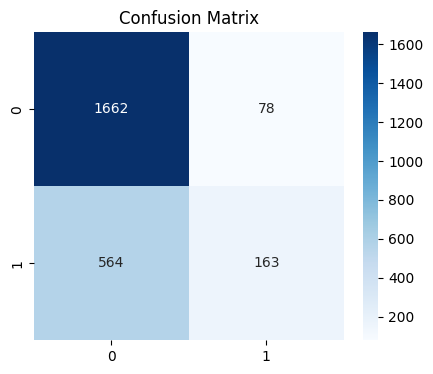

In [10]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


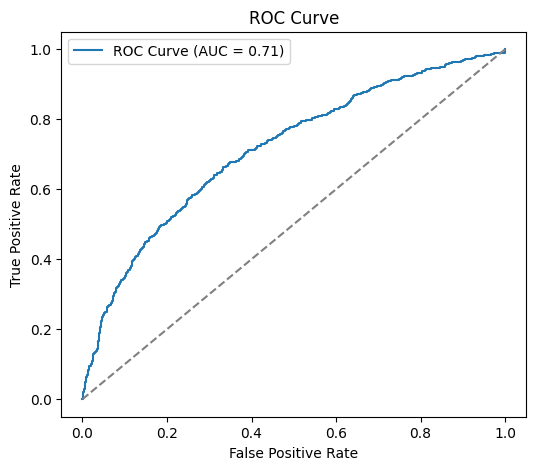

In [11]:
y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [12]:
coeff = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance:\n")
coeff



Feature Importance:



,Feature,Coefficient
12,Rex.in.Yrs,1.271642e-01
3,Notice.period,2.191846e-02
10,Gender,1.245296e-02
0,Candidate.Ref,2.384207e-07
8,Joining.Bonus,-3.219288e-04
5,Pecent.hike.expected.in.CTC,-8.266209e-04
6,Percent.hike.offered.in.CTC,-8.482766e-04
4,Offered.band,-2.787769e-03
13,LOB,-3.902626e-03
7,Percent.difference.CTC,-1.028624e-02
